In [1]:
#подключаем библиотеки
import pandas as pd
import pandahouse as ph
import numpy as np
from scipy import stats
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

import tensorflow as tf
import tensorflow_probability as tfp

from causalimpact import CausalImpact

2024-08-12 15:04:22.881886: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
#настройки графиков
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(15,6)}
        )

In [3]:
#подключаемся к кликхаусу
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20240720'
}

q = """
select toDate(time) as date, 
        countIf(user_id, action = 'like') as likes,  
        countIf(user_id, action = 'view') as views, 
        count(distinct user_id) as dau,
        likes / views as ctr, 
        count(user_id) / dau as actions_per_user,
        countIf(distinct post_id, action = 'view') as viewed_posts,
        countIf(distinct post_id, action = 'like') as liked_posts
from {db}.feed_actions
where toDate(time) between '2024-06-21' and '2024-07-18'
group by toDate(time)
"""

# Вытащили пользователей
df = ph.read_clickhouse(q, connection=connection)
df = df.set_index('date')

В качестве метрик, на которые мог повлиять наш флешмоб выбрал лайки, просмотры, dau, ctr, событий на пользователя, просмотренные посты, лайкнутые посты.

In [6]:
df.head()

,likes,views,dau,ctr,actions_per_user,viewed_posts,liked_posts
date,,,,,,,
2024-06-21,87162,422667,10814,0.206219,47.145275,217,213
2024-06-22,97368,464992,11567,0.209397,48.617619,209,205
2024-06-23,90847,429074,11739,0.211728,44.290059,193,191
2024-06-24,73362,354639,12501,0.206864,34.237341,177,174
2024-06-25,78507,367873,12597,0.213408,35.435421,180,177


In [7]:
pre_period=['2024-06-21', '2024-07-11']
post_period=['2024-07-12', '2024-07-18']
df_likes = df[['likes']]

In [9]:
#проверим лайки
impact = CausalImpact(df_likes, pre_period, post_period)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


2024-08-12 15:07:23.886396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [1]
	 [[{{node shape}}]]
2024-08-12 15:07:23.886802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [1]
	 [[{{node shape}}]]
2024-08-12 15:07:23.899332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [1]
	 [[{{node shape}}]]
2024-08-12 15:07:23.899657: I tens

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`


2024-08-12 15:07:24.223465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:07:24.249024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:07:24.842006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:

Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


2024-08-12 15:07:37.694355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2024-08-12 15:07:37.774132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

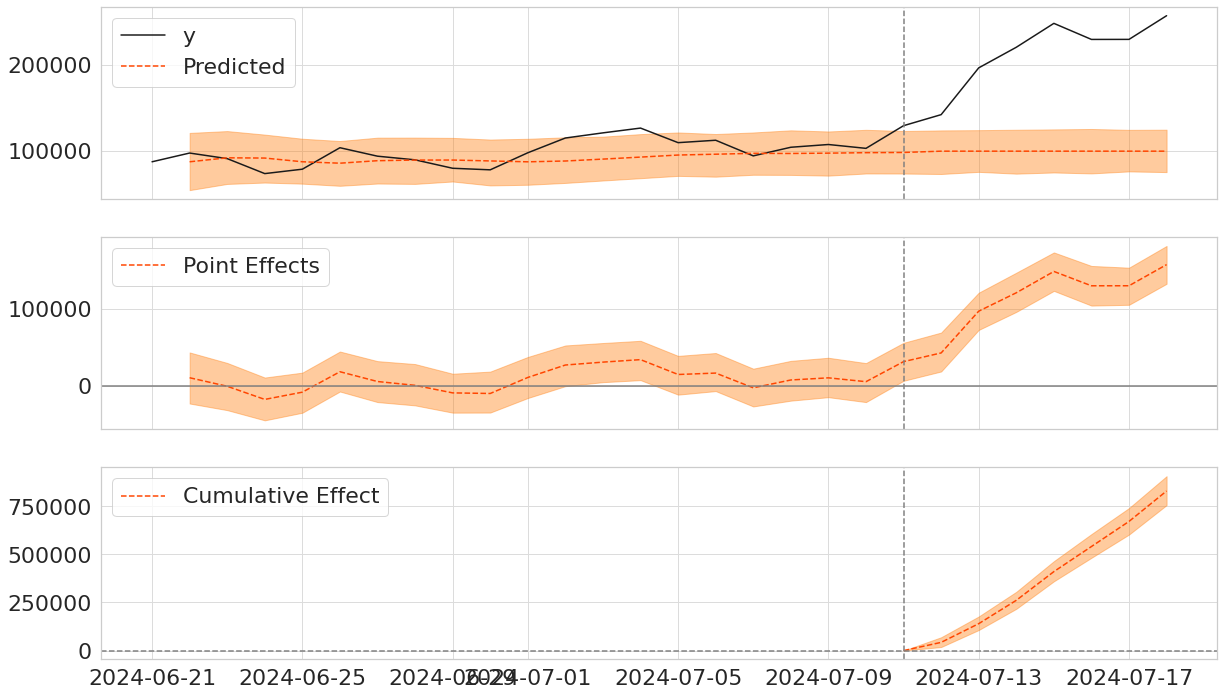

In [10]:
impact.plot(figsize=(20, 12))

In [11]:
#прирости ощутимый
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    218090.14          1526631.0
Prediction (s.d.)         99553.12 (5572.58) 696871.81 (39008.08)
95% CI                    [88422.45, 110266.57][618957.13, 771866.01]

Absolute effect (s.d.)    118537.02 (5572.58)829759.19 (39008.08)
95% CI                    [107823.57, 129667.69][754764.99, 907673.87]

Relative effect (s.d.)    119.07% (5.6%)     119.07% (5.6%)
95% CI                    [108.31%, 130.25%] [108.31%, 130.25%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [12]:
#проверим просмотры
df_views = df[['views']]
impact_views = CausalImpact(df_views, pre_period, post_period)

2024-08-12 15:08:44.795014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:08:44.818498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:08:45.328571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:

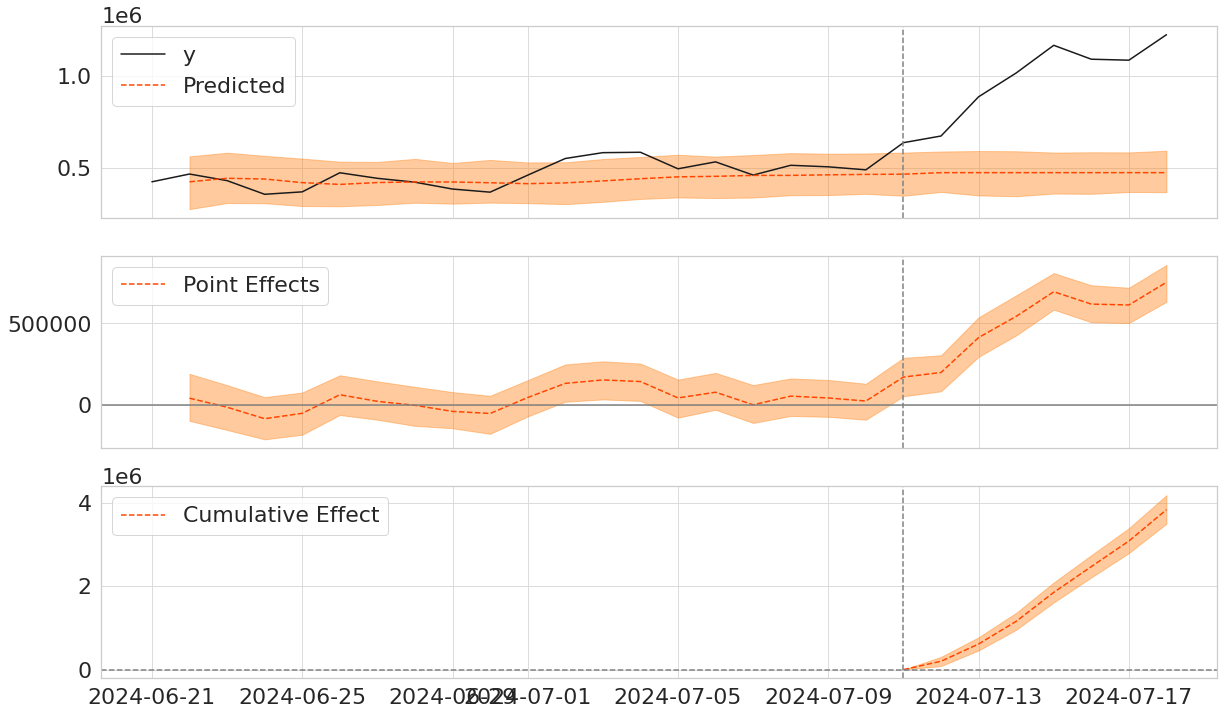

In [13]:
impact_views.plot(figsize=(20, 12))

In [14]:
#также прирост более чем в 2 раза
print(impact_views.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1019947.31         7139631.0
Prediction (s.d.)         472529.69 (24356.99)3307707.75 (170498.94)
95% CI                    [424331.36, 519809.04][2970319.44, 3638663.16]

Absolute effect (s.d.)    547417.62 (24356.99)3831923.25 (170498.94)
95% CI                    [500138.28, 595615.95][3500967.84, 4169311.56]

Relative effect (s.d.)    115.85% (5.15%)    115.85% (5.15%)
95% CI                    [105.84%, 126.05%] [105.84%, 126.05%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [15]:
#проверим DAU
df_dau = df[['dau']]
impact_dau = CausalImpact(df_dau, pre_period, post_period)

2024-08-12 15:09:32.740165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:09:32.762767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:09:33.372982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:

2024-08-12 15:09:45.868123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2024-08-12 15:09:45.944587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

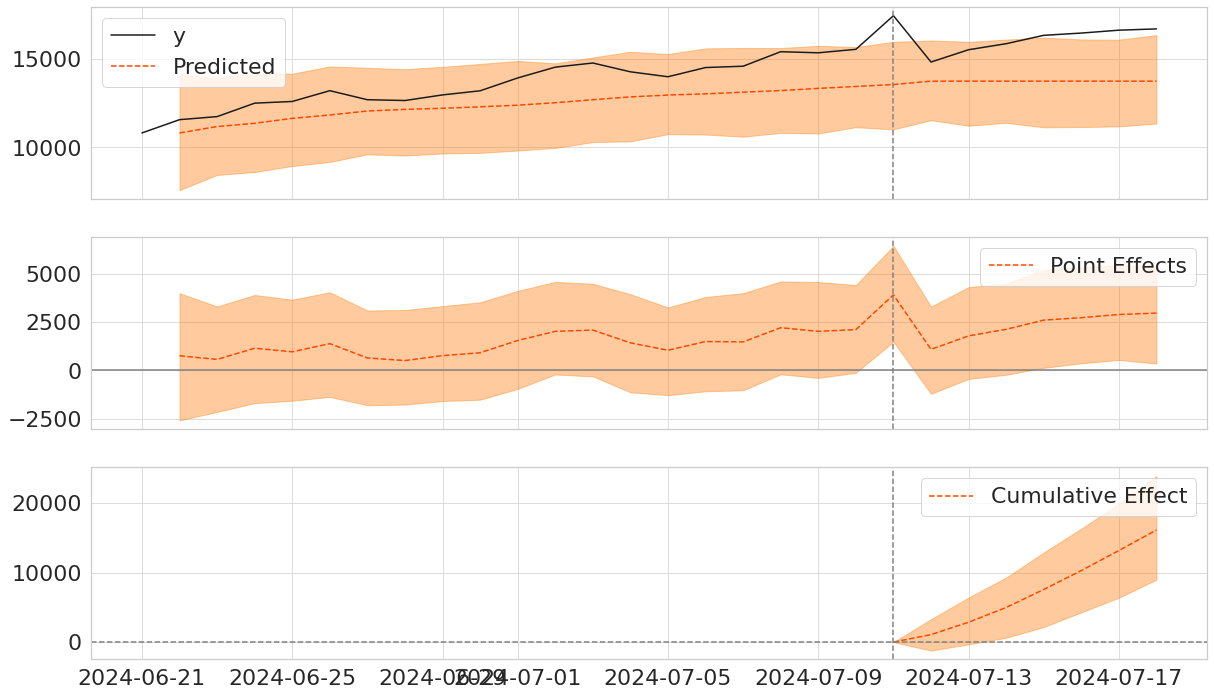

In [16]:
impact_dau.plot(figsize=(20, 12))

In [17]:
#dau вырос на 16%
print(impact_dau.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    16052.71           112369.0
Prediction (s.d.)         13746.84 (537.06)  96227.87 (3759.43)
95% CI                    [12681.61, 14786.85][88771.26, 103507.96]

Absolute effect (s.d.)    2305.88 (537.06)   16141.13 (3759.43)
95% CI                    [1265.86, 3371.11] [8861.04, 23597.74]

Relative effect (s.d.)    16.77% (3.91%)     16.77% (3.91%)
95% CI                    [9.21%, 24.52%]    [9.21%, 24.52%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [19]:
#проверим кол-во событий на пользователя
df_actions_per_user= df[['actions_per_user']]
impact_actions_per_user = CausalImpact(df_actions_per_user, pre_period, post_period)

2024-08-12 15:14:08.849528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:14:08.872398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:14:09.804816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:

2024-08-12 15:14:22.050653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2024-08-12 15:14:22.129786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

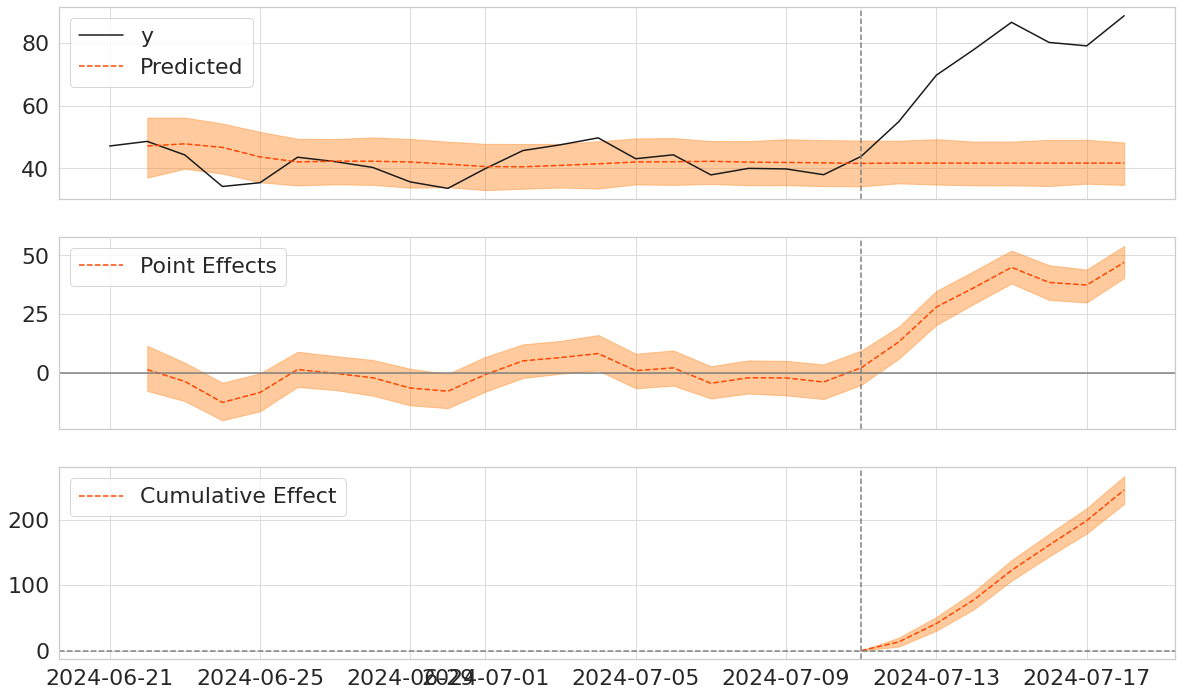

In [20]:
impact_actions_per_user.plot(figsize=(20, 12))

In [21]:
#прирост на 80%
print(impact_actions_per_user.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    76.74              537.15
Prediction (s.d.)         41.7 (1.46)        291.9 (10.22)
95% CI                    [38.92, 44.64]     [272.44, 312.51]

Absolute effect (s.d.)    35.04 (1.46)       245.25 (10.22)
95% CI                    [32.09, 37.82]     [224.63, 264.71]

Relative effect (s.d.)    84.02% (3.5%)      84.02% (3.5%)
95% CI                    [76.96%, 90.69%]   [76.96%, 90.69%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [22]:
#проверим кол-во просмотренных постов
df_viewed_posts= df[['viewed_posts']]
impact_viewed_posts = CausalImpact(df_viewed_posts, pre_period, post_period)

2024-08-12 15:14:57.321271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:14:57.342996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:14:57.884210: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:

2024-08-12 15:15:10.432643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2024-08-12 15:15:10.511380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

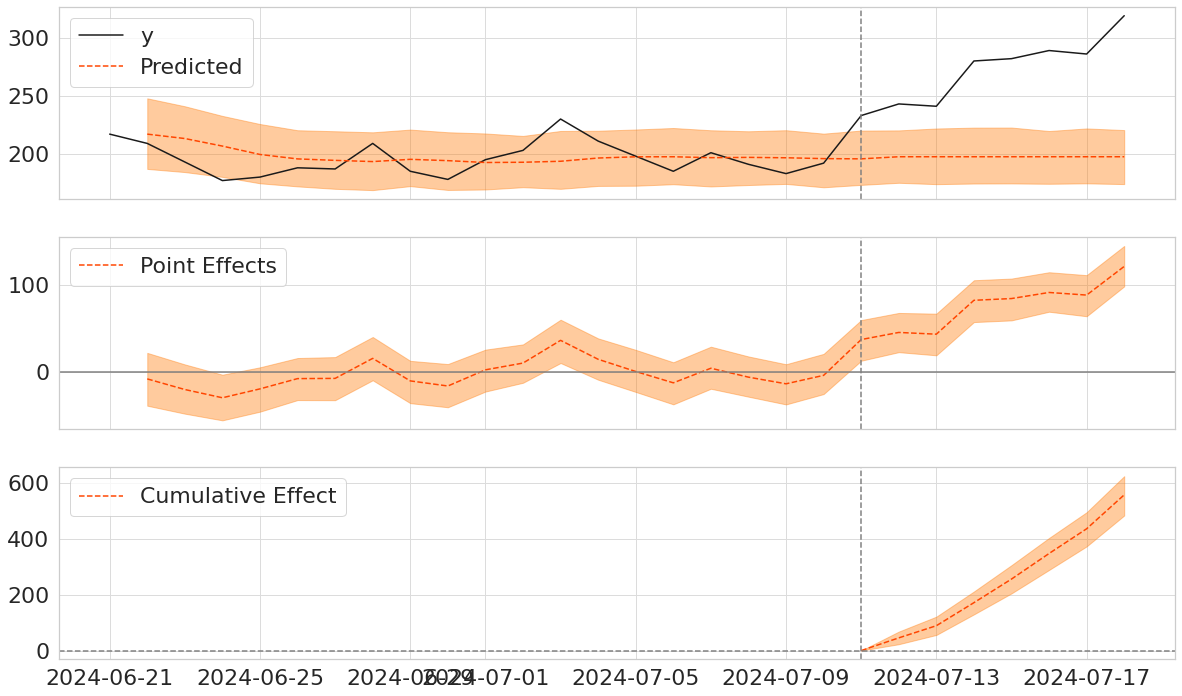

In [23]:
impact_viewed_posts.plot(figsize=(20, 12))

In [24]:
#прирост на 40%
print(impact_viewed_posts.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    277.14             1940.0
Prediction (s.d.)         197.52 (4.99)      1382.66 (34.93)
95% CI                    [187.49, 207.04]   [1312.4, 1449.31]

Absolute effect (s.d.)    79.62 (4.99)       557.34 (34.93)
95% CI                    [70.1, 89.66]      [490.69, 627.6]

Relative effect (s.d.)    40.31% (2.53%)     40.31% (2.53%)
95% CI                    [35.49%, 45.39%]   [35.49%, 45.39%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [26]:
#проверим лайкнутые посты
df_liked_posts = df[['liked_posts']]
impact_liked_posts = CausalImpact(df_liked_posts, pre_period, post_period)

2024-08-12 15:16:18.562224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:16:18.583722: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:16:19.109587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:

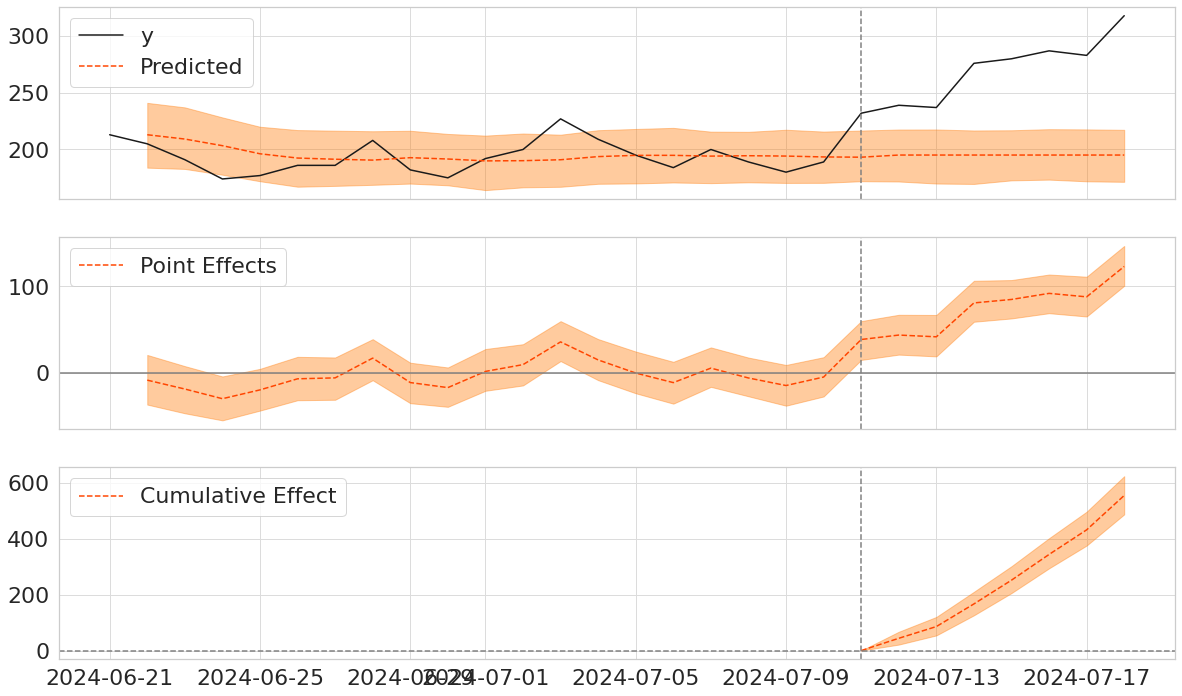

In [27]:
impact_liked_posts.plot(figsize=(20, 12))

In [28]:
#прирост на 40;
print(impact_liked_posts.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    274.29             1920.0
Prediction (s.d.)         195.1 (5.19)       1365.68 (36.32)
95% CI                    [185.24, 205.58]   [1296.69, 1439.07]

Absolute effect (s.d.)    79.19 (5.19)       554.32 (36.32)
95% CI                    [68.7, 89.04]      [480.93, 623.31]

Relative effect (s.d.)    40.59% (2.66%)     40.59% (2.66%)
95% CI                    [35.22%, 45.64%]   [35.22%, 45.64%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [29]:
#проверим ctr
df_ctr = df[['ctr']]
impact_ctr = CausalImpact(df_ctr, pre_period, post_period)

2024-08-12 15:19:38.403972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:19:38.427454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:19:39.002217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:

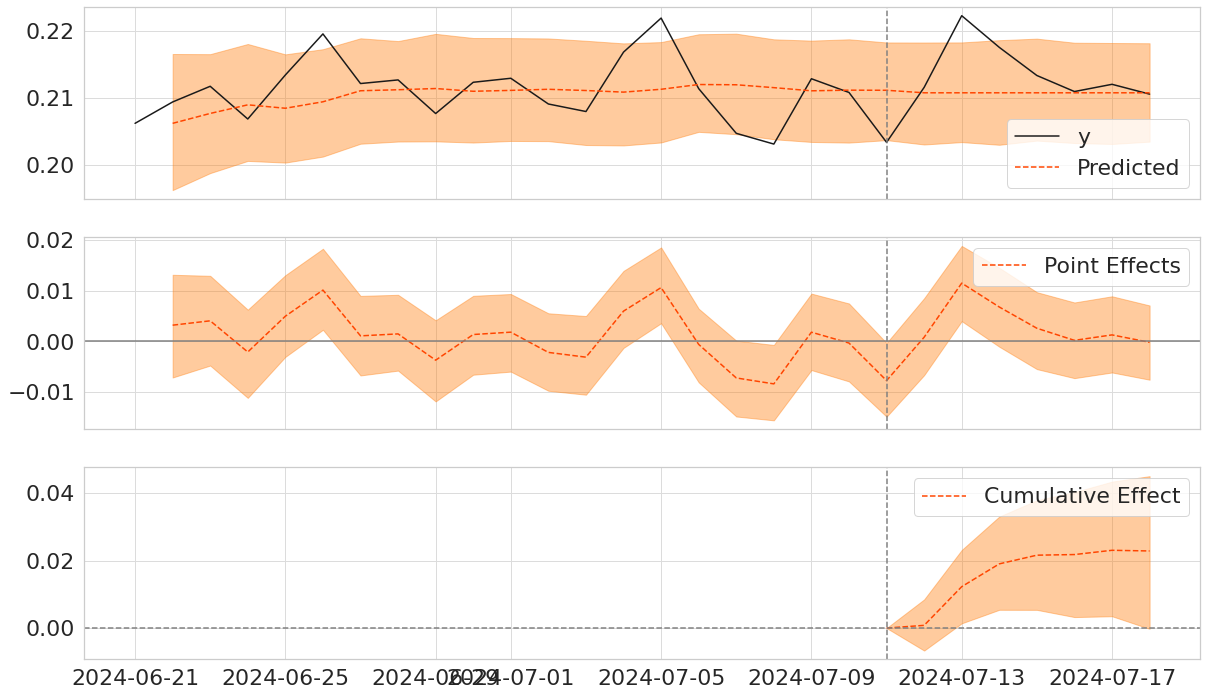

In [30]:
impact_ctr.plot(figsize=(20, 12))

In [31]:
#эффект не такой явный как в предыдущих метриках, но он есть
print(impact_ctr.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               1.5
Prediction (s.d.)         0.21 (0.0)         1.48 (0.01)
95% CI                    [0.21, 0.21]       [1.45, 1.5]

Absolute effect (s.d.)    0.0 (0.0)          0.02 (0.01)
95% CI                    [0.0, 0.01]        [0.0, 0.04]

Relative effect (s.d.)    1.55% (0.76%)      1.55% (0.76%)
95% CI                    [0.05%, 3.05%]     [0.05%, 3.05%]

Posterior tail-area probability p: 0.02
Posterior prob. of a causal effect: 97.8%

For more details run the command: print(impact.summary('report'))


Проверим был ли эффект долгосрочным. Для этого посчитаем как изменились наши метрики с момента окончания флешмоба

In [32]:
q2 = """
select toDate(time) as date, 
        countIf(user_id, action = 'like') as likes,  
        countIf(user_id, action = 'view') as views, 
        count(distinct user_id) as dau,
        likes / views as ctr, 
        count(user_id) / dau as actions_per_user,
        countIf(distinct post_id, action = 'view') as viewed_posts,
        countIf(distinct post_id, action = 'like') as liked_posts
from {db}.feed_actions
where toDate(time) between '2024-07-12' and '2024-08-01'
group by toDate(time)
"""

# Вытащили пользователей
df2 = ph.read_clickhouse(q2, connection=connection)
df2 = df2.set_index('date')

In [34]:
pre_period2 = post_period
post_period2 = ['2024-07-19', '2024-08-01']

df2_likes = df2[['likes']]
df2_views = df2[['views']]
df2_dau = df2[['dau']]
df2_actions_per_user = df2[['actions_per_user']]
df2_viewed_posts = df2[['viewed_posts']]
df2_liked_posts = df2[['liked_posts']]
df2_ctr = df2[['ctr']]

In [35]:
#сразу обсчитаем все метрики
impact2_likes = CausalImpact(df2_likes, pre_period2, post_period2)
impact2_views = CausalImpact(df2_views, pre_period2, post_period2)
impact2_dau = CausalImpact(df2_dau, pre_period2, post_period2)
impact2_actions_per_user = CausalImpact(df2_actions_per_user, pre_period2, post_period2)
impact2_viewed_posts = CausalImpact(df2_viewed_posts, pre_period2, post_period2)
impact2_liked_posts = CausalImpact(df2_liked_posts, pre_period2, post_period2)
impact2_ctr = CausalImpact(df2_ctr, pre_period2, post_period2)

2024-08-12 15:24:43.225999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:24:43.249247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:24:43.768206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-08-12 15:

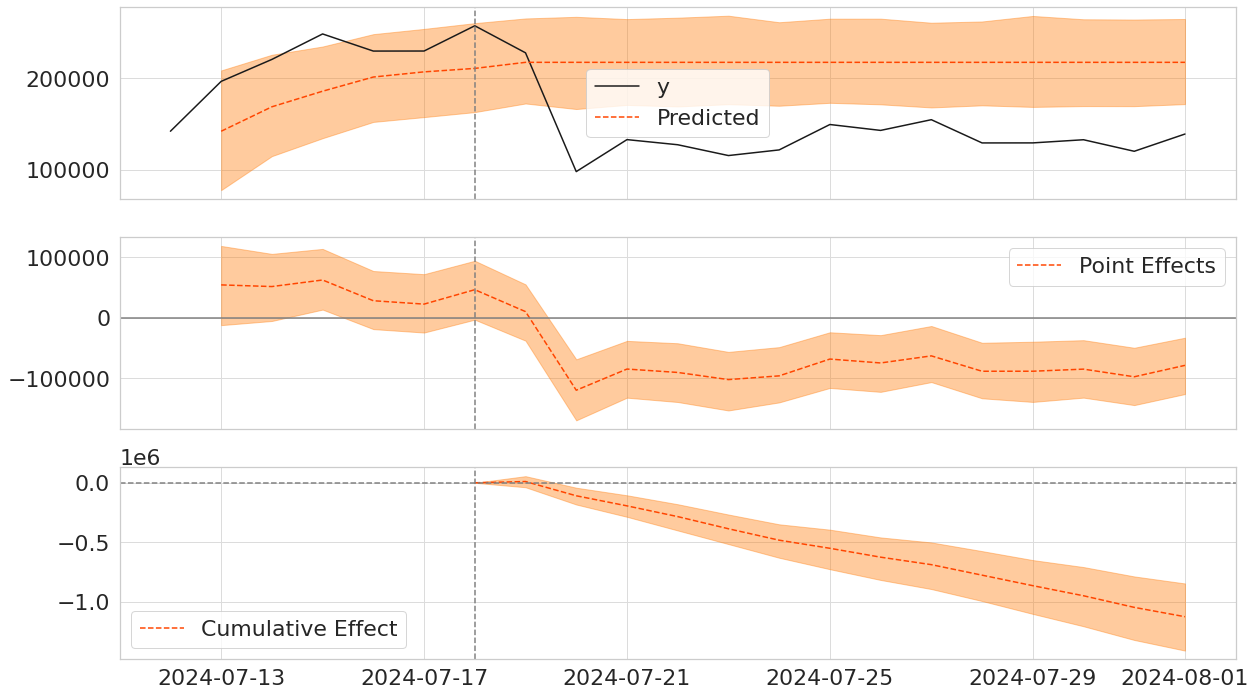

In [36]:
impact2_likes.plot(figsize=(20, 12))

In [37]:
#лайки сразу упали после флешмоба
print(impact2_likes.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    137325.14          1922552.0
Prediction (s.d.)         217702.7 (10165.01)3047837.75 (142310.15)
95% CI                    [197438.56, 237284.68][2764139.72, 3321985.38]

Absolute effect (s.d.)    -80377.56 (10165.01)-1125285.75 (142310.15)
95% CI                    [-99959.54, -60113.42][-1399433.38, -841587.72]

Relative effect (s.d.)    -36.92% (4.67%)    -36.92% (4.67%)
95% CI                    [-45.92%, -27.61%] [-45.92%, -27.61%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


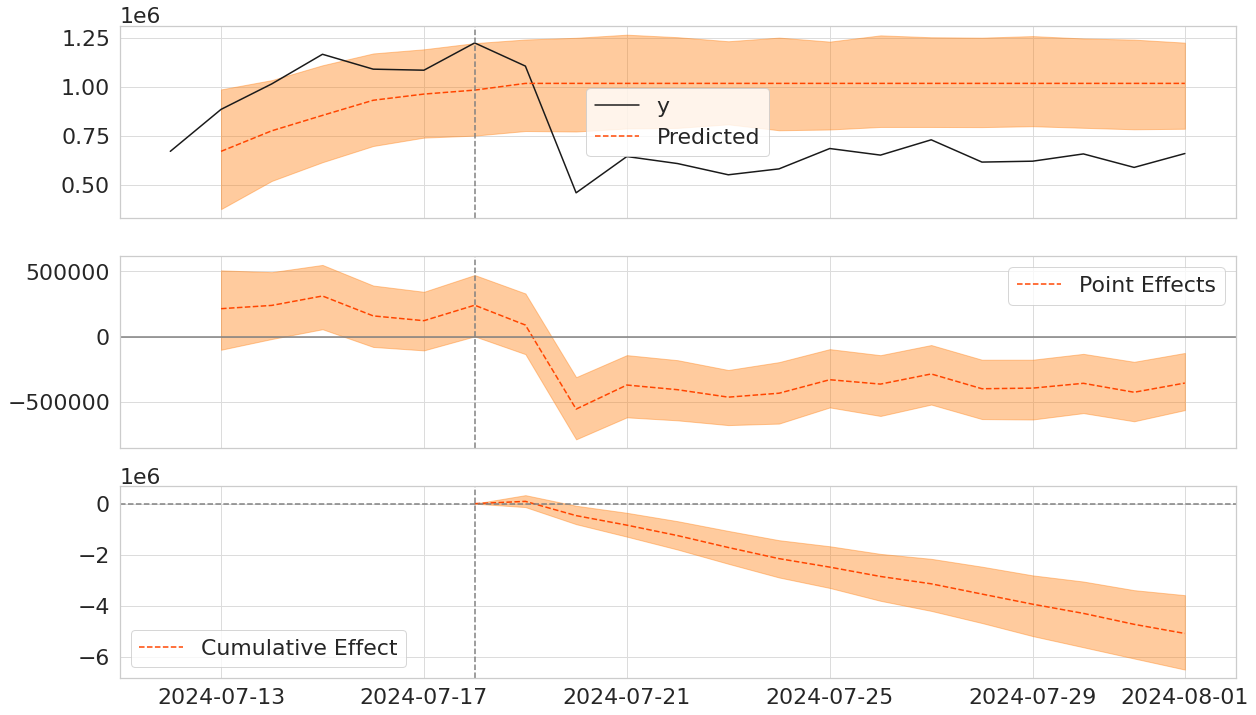

In [38]:
impact2_views.plot(figsize=(20, 12))

In [39]:
#просмотры тоже упали после флешмоба
print(impact2_views.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    655685.56          9179598.0
Prediction (s.d.)         1018084.19 (52198.58)14253179.0 (730780.14)
95% CI                    [916695.72, 1121310.46][12833739.78, 15698345.9]

Absolute effect (s.d.)    -362398.62 (52198.58)-5073581.0 (730780.14)
95% CI                    [-465624.89, -261010.16][-6518747.9, -3654141.78]

Relative effect (s.d.)    -35.6% (5.13%)     -35.6% (5.13%)
95% CI                    [-45.74%, -25.64%] [-45.74%, -25.64%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


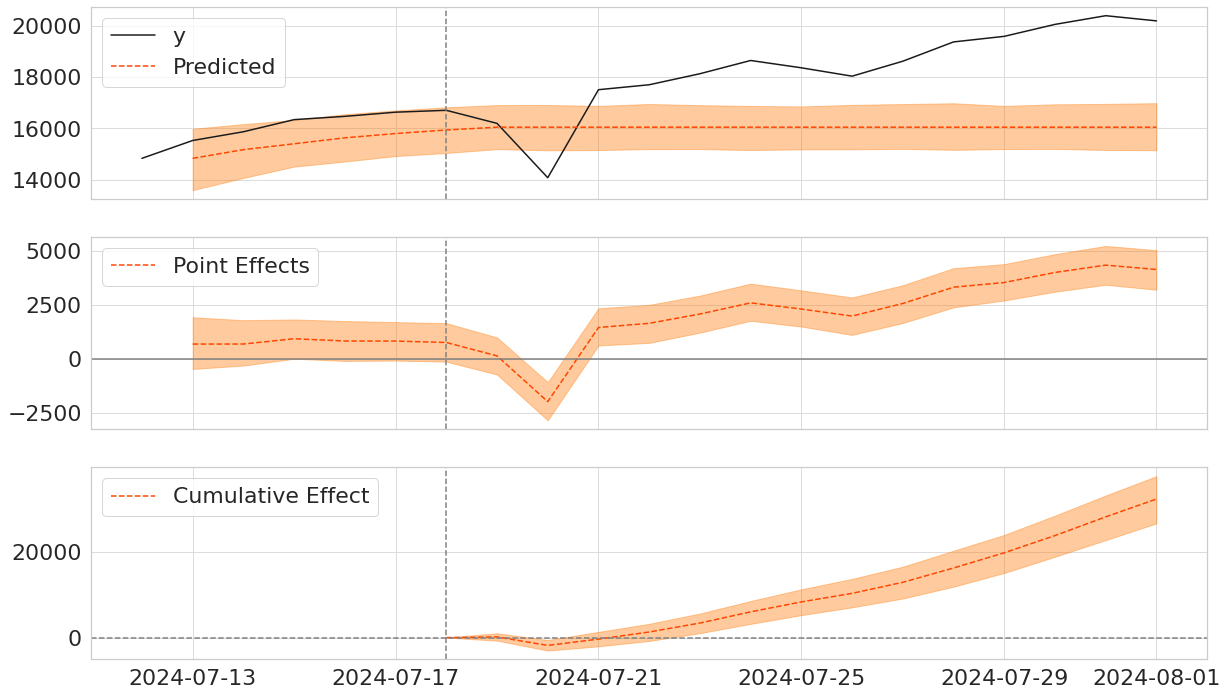

In [40]:
impact2_dau.plot(figsize=(20, 12))

In [41]:
#dau увеличился, но кажется что это связано не совсем со флешмобом, а с какими-то другими факторами (может быть просто естественное развитие продукта)
print(impact2_dau.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    18351.5            256921.0
Prediction (s.d.)         16045.21 (190.07)  224632.88 (2660.95)
95% CI                    [15660.44, 16405.49][219246.1, 229676.85]

Absolute effect (s.d.)    2306.29 (190.07)   32288.12 (2660.95)
95% CI                    [1946.01, 2691.06] [27244.15, 37674.9]

Relative effect (s.d.)    14.37% (1.18%)     14.37% (1.18%)
95% CI                    [12.13%, 16.77%]   [12.13%, 16.77%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


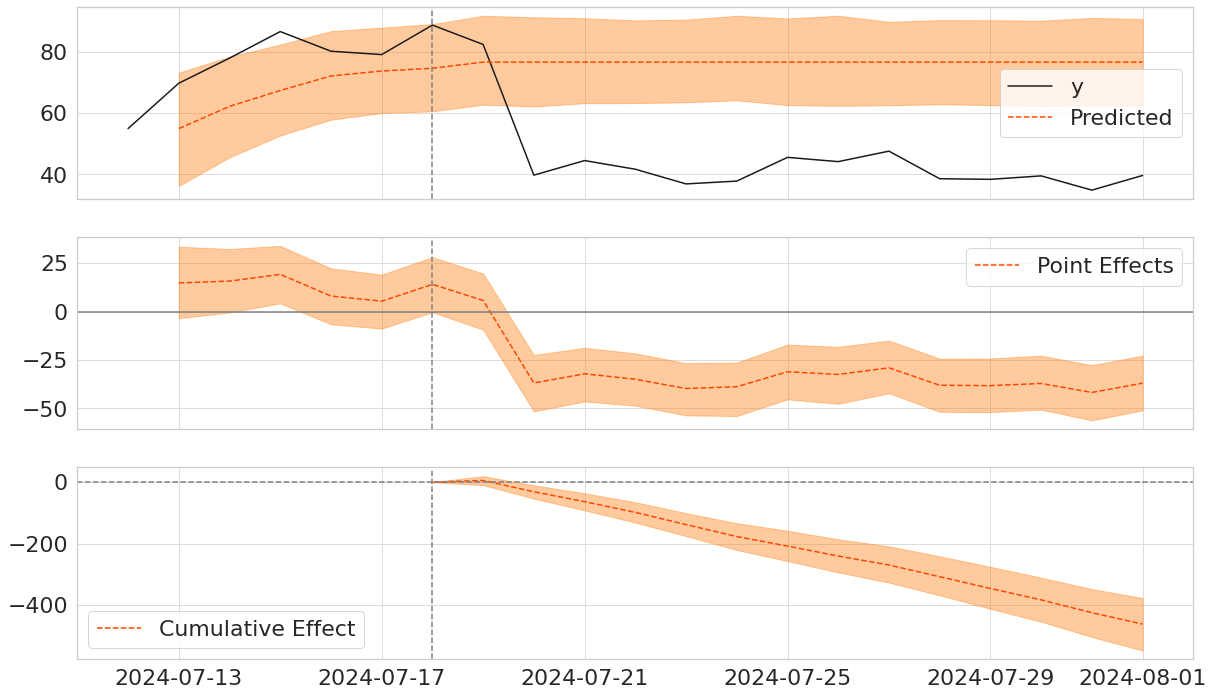

In [42]:
impact2_actions_per_user.plot(figsize=(20, 12))

In [43]:
#события на пользователя также упали
print(impact2_actions_per_user.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    43.64              610.96
Prediction (s.d.)         76.62 (3.23)       1072.69 (45.19)
95% CI                    [70.69, 83.34]     [989.7, 1166.83]

Absolute effect (s.d.)    -32.98 (3.23)      -461.73 (45.19)
95% CI                    [-39.7, -27.05]    [-555.86, -378.73]

Relative effect (s.d.)    -43.04% (4.21%)    -43.04% (4.21%)
95% CI                    [-51.82%, -35.31%] [-51.82%, -35.31%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


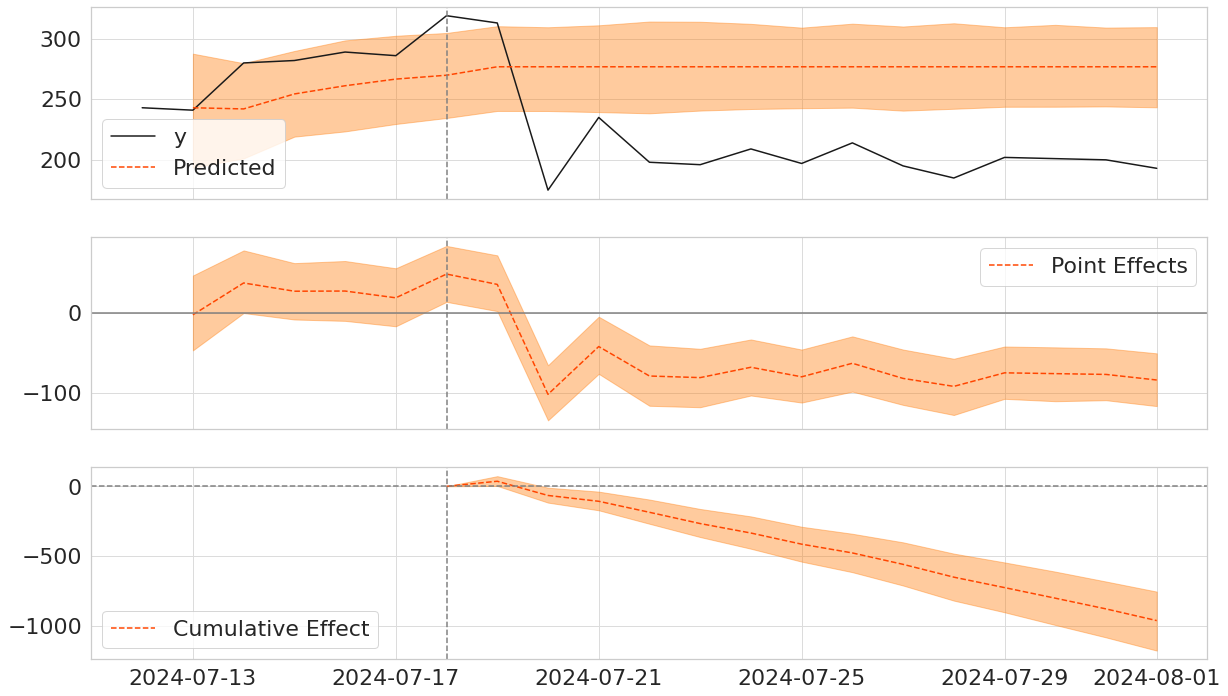

In [44]:
impact2_viewed_posts.plot(figsize=(20, 12))

In [45]:
#просмотренные посты тоже
print(impact2_viewed_posts.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    208.07             2913.0
Prediction (s.d.)         276.83 (7.57)      3875.6 (105.97)
95% CI                    [261.94, 291.61]   [3667.2, 4082.6]

Absolute effect (s.d.)    -68.76 (7.57)      -962.6 (105.97)
95% CI                    [-83.54, -53.87]   [-1169.6, -754.2]

Relative effect (s.d.)    -24.84% (2.73%)    -24.84% (2.73%)
95% CI                    [-30.18%, -19.46%] [-30.18%, -19.46%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


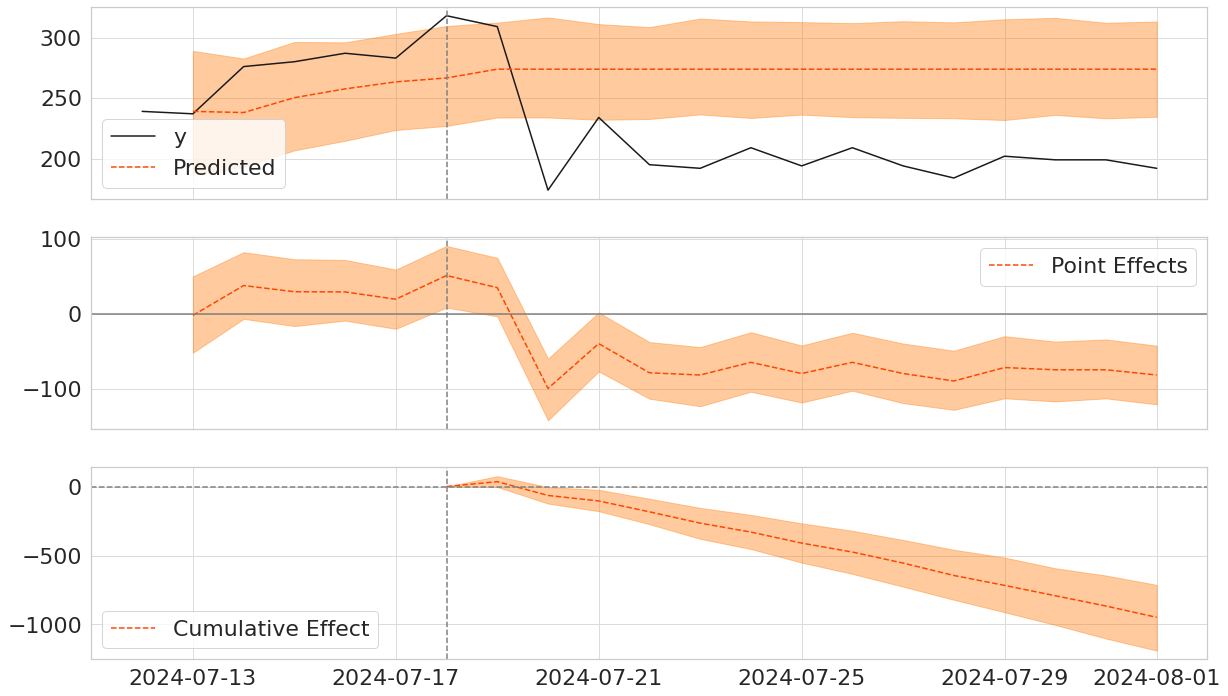

In [46]:
impact2_liked_posts.plot(figsize=(20, 12))

In [47]:
#лайкнутые посты также упали
print(impact2_liked_posts.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    206.14             2886.0
Prediction (s.d.)         273.86 (8.8)       3834.1 (123.2)
95% CI                    [255.77, 290.27]   [3580.84, 4063.8]

Absolute effect (s.d.)    -67.72 (8.8)       -948.1 (123.2)
95% CI                    [-84.13, -49.63]   [-1177.8, -694.84]

Relative effect (s.d.)    -24.73% (3.21%)    -24.73% (3.21%)
95% CI                    [-30.72%, -18.12%] [-30.72%, -18.12%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


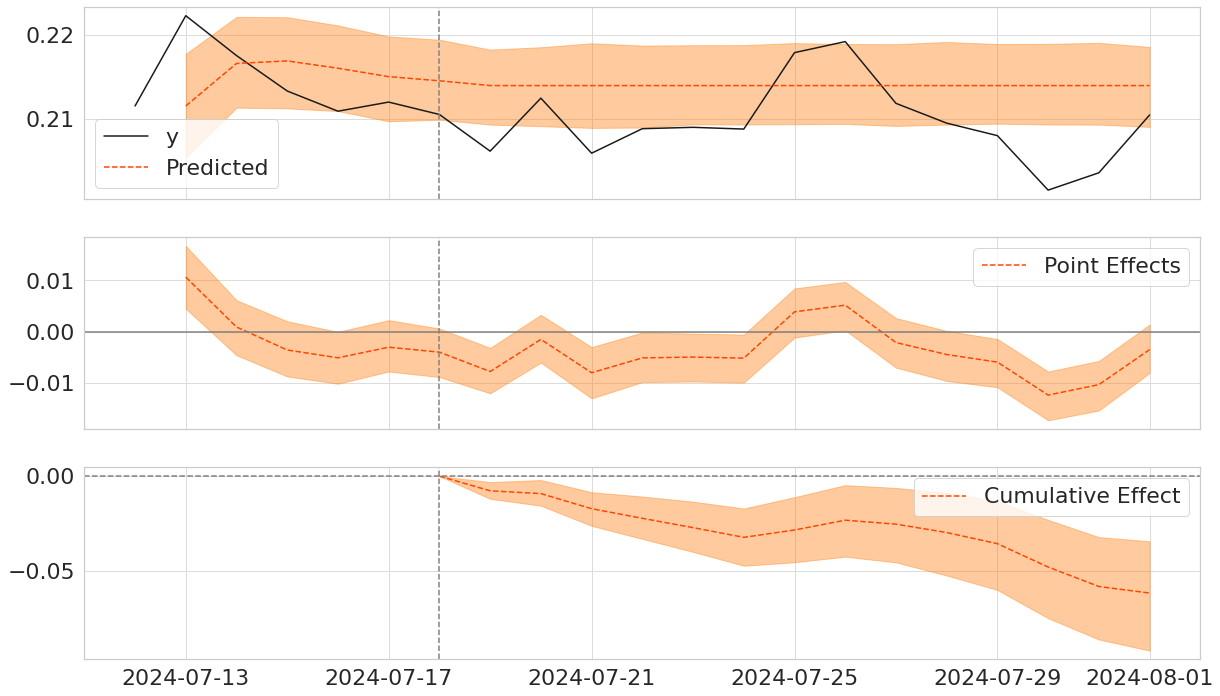

In [48]:
impact2_ctr.plot(figsize=(20, 12))

In [49]:
#ctr тоже упал
print(impact2_ctr.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               2.93
Prediction (s.d.)         0.21 (0.0)         3.0 (0.01)
95% CI                    [0.21, 0.22]       [2.97, 3.03]

Absolute effect (s.d.)    -0.0 (0.0)         -0.06 (0.01)
95% CI                    [-0.01, -0.0]      [-0.09, -0.03]

Relative effect (s.d.)    -2.06% (0.49%)     -2.06% (0.49%)
95% CI                    [-3.06%, -1.13%]   [-3.06%, -1.13%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


Итого: все выбранные метрики (лайки, просмотры, dau, ctr, событий на пользователя, просмотренные посты, лайкнутые посты) показали свой рост на период флешмоба.
Однако этот эффект был не долгосрочным, по крайней мере для всех метрик, кроме DAU.